In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms


from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
os.getcwd()
# place the files in your IDE working dicrectory .
labels = pd.read_csv(r'data.csv')
#submission = pd.read_csv(r'/aerialcactus/sample_submission.csv)

train_path = r'CT_Skull_Fractures/data/train/'
test_path = r'CT_Skull_Fractures/data/test'


labels.head()

,id,broken
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Total cases =  8685 
0    7153
1    1532
Name: broken, dtype: int64


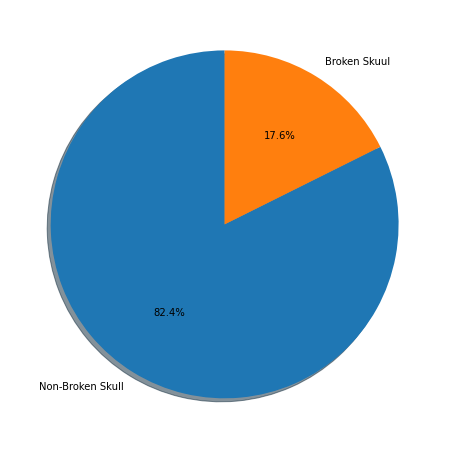

In [3]:
print("Total cases = ", 7153+1532, '\n============')
print(labels['broken'].value_counts())

label = 'Non-Broken Skull', 'Broken Skuul'
plt.figure(figsize = (8,8))
plt.pie(labels.groupby('broken').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

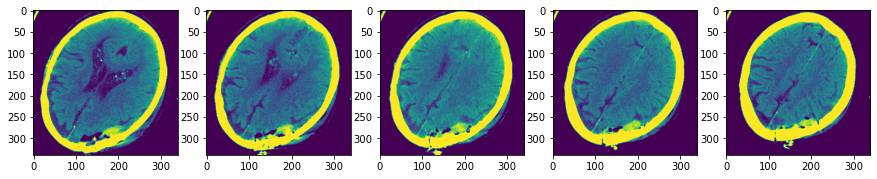

In [4]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['broken'] == 1]['id'][:5]):
    path = os.path.join(train_path,str(idx)+'.png')
    ax[i].imshow(img.imread(path))

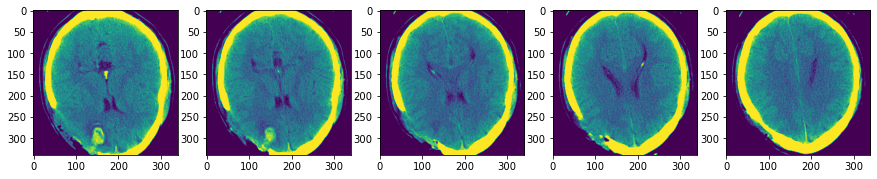

In [6]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['broken'] == 1]['id'][-5:]):
    path = os.path.join(test_path,str(idx)+'.png')
    ax[i].imshow(img.imread(path))

In [10]:
# /homedtic/ikoren/skull/test/original_data

b = labels.loc[labels['broken'] == 1]
b = list(b['id'])

nb = labels.loc[labels['broken'] == 0]
nb = list(nb['id'])

print('Broken = ', len(b))
print('Non-Broken = ', len(nb))

Broken =  1532
Non-Broken =  7153


In [25]:
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

def delete_file_or_path(path):
    """ param <path> could either be relative or absolute. """
    if os.path.isfile(path) or os.path.islink(path):
        os.remove(path)  # remove the file
    elif os.path.isdir(path):
        shutil.rmtree(path)  # remove dir and all contains
    else:
        raise ValueError("file {} is not a file or dir.".format(path))
        
        
#delete_file_or_path('CT_Skull_Fractures/...')

In [72]:
def remove_criteria(path , listy):
    cnt1 = 0
    cnt2 = 0
    rem=0
    for root, dirs, files in os.walk(path):
            for file in files:
                p = os.path.join(root, file)
                if os.path.isfile(p):
                    tmp = p[len(path):]
                    tmp2=rchop(tmp, '.png') 
                    tmp2=int(tmp2)
                    
                    # if it is broken class
                    if tmp2 in listy:
                        cnt1+=1
                        print(tmp2, "----------------------> REMOVED!")
                        #os.remove(p)
                        #rem+=1 
                    
                    # if it is non-broken class
                    else:
                        cnt2+=1
                        print(tmp2, "----------------------")
                        #os.remove(p)
                        #rem+=1                
    # print information
    print("=============================")
    print("Removed ", rem, "out of ", cnt1+cnt2, " files")
    print("you stayed with ", (cnt1+cnt2)-rem, " files in directory!")
    
# Call the Function
#remove_criteria('CT_Skull_Fractures/...' , b)

161 ----------------------
65 ----------------------
214 ----------------------
398 ----------------------
335 ----------------------
553 ----------------------
24 ----------------------
347 ----------------------
360 ----------------------
749 ----------------------
348 ----------------------
752 ----------------------
589 ----------------------
788 ----------------------
540 ----------------------
177 ----------------------
384 ----------------------
43 ----------------------
361 ----------------------
700 ----------------------
39 ----------------------
862 ----------------------> REMOVED!
514 ----------------------
357 ----------------------
422 ----------------------
861 ----------------------> REMOVED!
656 ----------------------
520 ----------------------
143 ----------------------
352 ----------------------
550 ----------------------
895 ----------------------> REMOVED!
270 ----------------------
614 ----------------------
91 ----------------------
793 ----------------------
748